In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv('heart.csv')
df.head()

df.columns=df.columns.str.lower()

df['heartdisease']=df['heartdisease'].map({0:'healthy',1:'sick'})

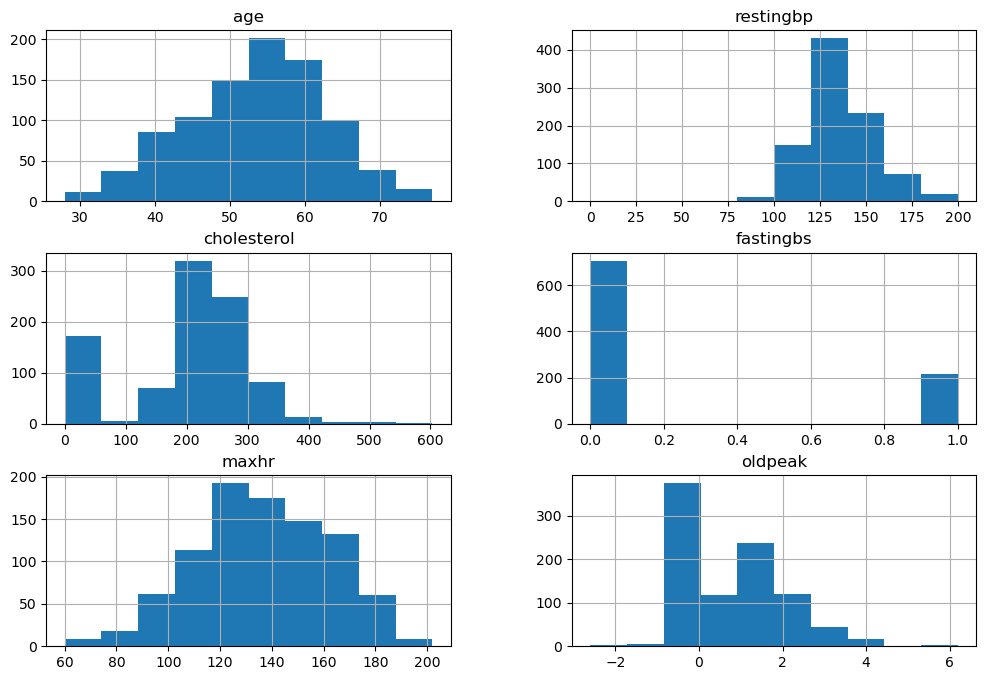

<Axes: >

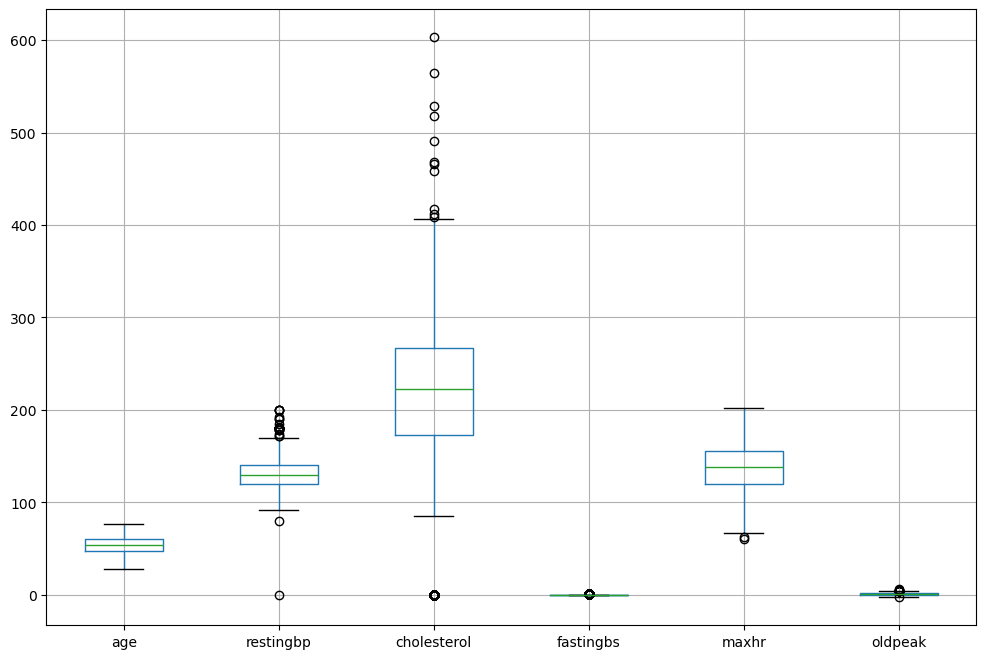

In [60]:
df.hist(figsize=(12,8))
plt.show()

df.boxplot(figsize=(12,8))

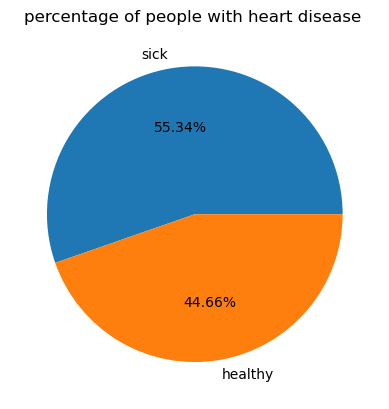

In [61]:
x=df['heartdisease'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%1.2f%%')
plt.title('percentage of people with heart disease ')
plt.show()

In [62]:
df.isna().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [63]:
df.duplicated().sum()

0

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [65]:
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [66]:
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,healthy
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,sick
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,healthy
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,sick
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,healthy


### age

In [67]:
df['age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

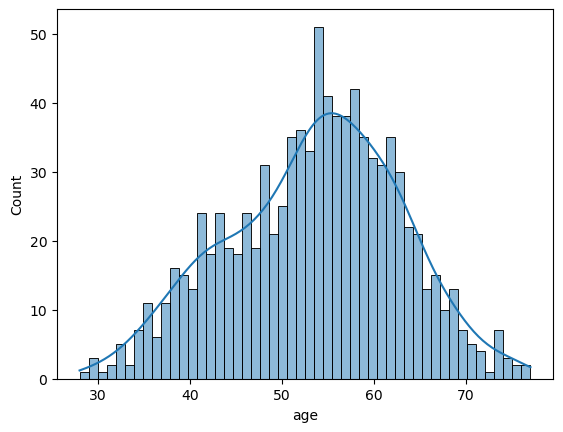

77
53.510893246187365
28


In [68]:
sns.histplot(df['age'],bins=50,kde=True)
plt.show()

print(df['age'].max())
print(df['age'].mean())
print(df['age'].min())

### patients age are normally distribued across the interval of 28 and 77 around there mean of 53 and a half years old

In [69]:
def age_classification(x):
    if x<45:
        return 'under 45'
    if x<60:
        return 'between 45 and 60'
    else:
        return 'over 60'

In [70]:
df['age_classification']=df['age'].apply(age_classification)

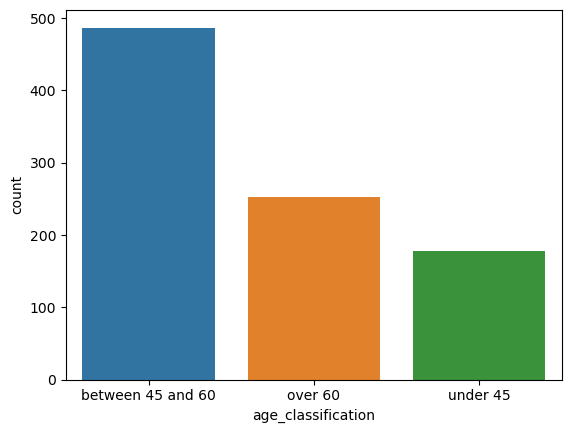

In [71]:
age=df['age_classification'].value_counts().reset_index()

sns.barplot(age,x='age_classification',y='count',hue='age_classification')
plt.show()

### most the patients are between 45 and 60

0.7312252964426877


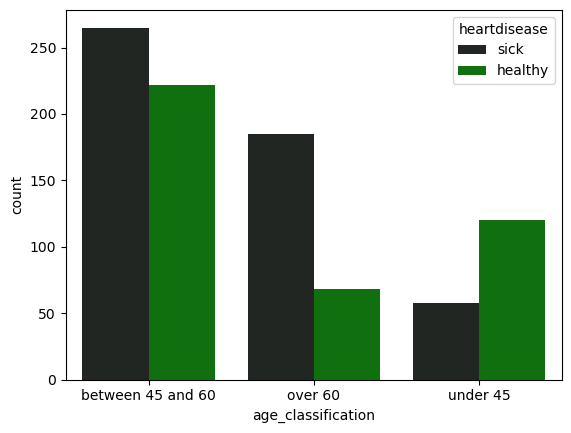

In [72]:
age_x_heartdisease=df.groupby('age_classification')['heartdisease'].value_counts().reset_index()
#print(age_x_heartdisease)

over60_disease_percentge=age_x_heartdisease['count'][2]/(age_x_heartdisease['count'][2]+age_x_heartdisease['count'][3])

print(over60_disease_percentge)
sns.barplot(age_x_heartdisease,x='age_classification',y='count',hue='heartdisease',color='green')
plt.show()

### patients over 60 have an over 70 % chnace of ahving heart disease 

### Sex

In [73]:
x=df.groupby('sex')['heartdisease'].value_counts().reset_index()

f=x['count'][1]/(x['count'][0]+x['count'][1])

print(f'{round(f*100)} % are likely to get heart disease')
m=x['count'][2]/(x['count'][2]+x['count'][3])

print(f'{round(m*100)} % of men are more likely to get heart disease')

print('men are 3 times more likely to get heart disease than women')

26 % are likely to get heart disease
63 % of men are more likely to get heart disease
men are 3 times more likely to get heart disease than women


### Angina

  exerciseangina heartdisease  count
0              N      healthy    355
1              N         sick    192
2              Y         sick    316
3              Y      healthy     55
35
85


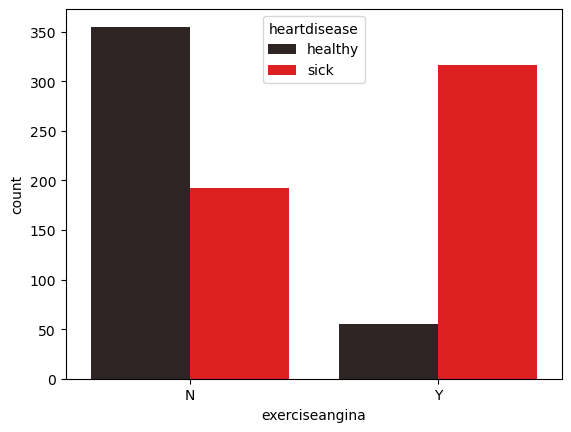

In [74]:
agina_x_heartdisease=df.groupby('exerciseangina')['heartdisease'].value_counts().reset_index()

print(agina_x_heartdisease)

n=agina_x_heartdisease['count'][1]/(agina_x_heartdisease['count'][0]+agina_x_heartdisease['count'][1])

y=agina_x_heartdisease['count'][2]/(agina_x_heartdisease['count'][2]+agina_x_heartdisease['count'][3])

print(f'{round(n*100)}')
print(f'{round(y*100)}')

sns.barplot(agina_x_heartdisease,x='exerciseangina',y='count',hue='heartdisease',color='red')

plt.show()

### patients who suffer from excercise angina have a very high chance of 85 % of having a heart disease 
### while others have only 35 %

### chestpain

In [75]:
df['chestpaintype'].value_counts()

df.groupby('chestpaintype')['heartdisease'].value_counts()



chestpaintype  heartdisease
ASY            sick            392
               healthy         104
ATA            healthy         149
               sick             24
NAP            healthy         131
               sick             72
TA             healthy          26
               sick             20
Name: count, dtype: int64

heartdisease   healthy  sick
chestpaintype               
ASY                104   392
ATA                149    24
NAP                131    72
TA                  26    20


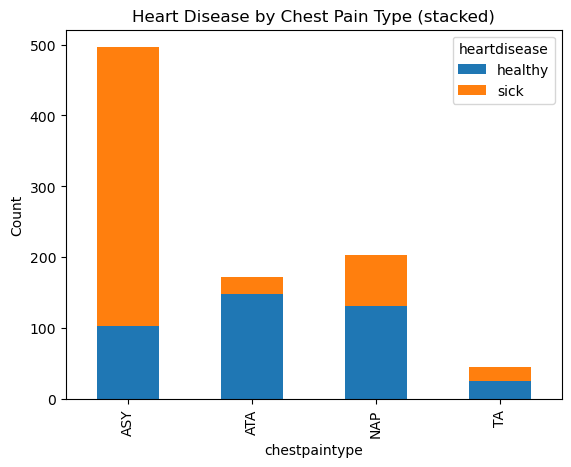

In [76]:
ct = pd.crosstab(df["chestpaintype"], df["heartdisease"])
print(ct)
ct.plot(kind="bar", stacked=True)
plt.ylabel("Count")
plt.title("Heart Disease by Chest Pain Type (stacked)")
plt.show()

### patients with asymptomatic chestpain also known as silent heart attack have a very high chance of heart disease which is why they should have routine check ups

### Resting ECG

In [77]:
df['restingecg'].value_counts()

restingecg
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

<Axes: xlabel='restingecg', ylabel='count'>

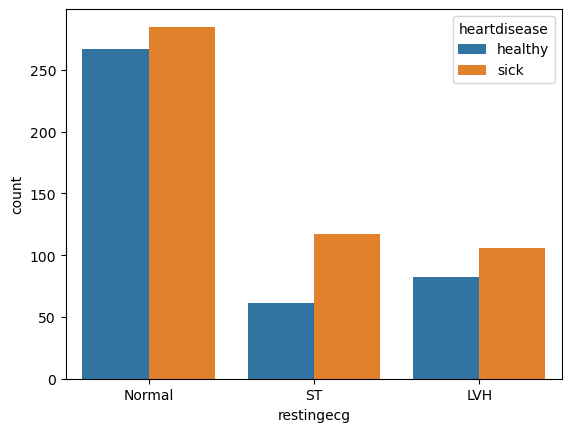

In [78]:
df.groupby('restingecg')['heartdisease'].value_counts()
sns.countplot(data=df,x='restingecg',hue='heartdisease')

### Fasting BS

<Axes: xlabel='fastingbs', ylabel='count'>

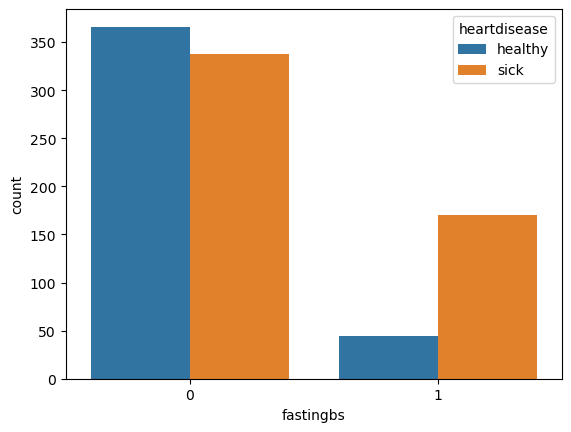

In [79]:
df.groupby('fastingbs')['heartdisease'].value_counts()

sns.countplot(data=df,x='fastingbs',hue='heartdisease')

### Resting BP

In [80]:
df.groupby('restingbp')['heartdisease'].value_counts()
df['restingbp'].value_counts()
df['restingbp'].describe()
df[df['restingbp']==0]
df.loc[449,'restingbp']=110



In [81]:
df.groupby('restingbp')['heartdisease'].value_counts()
df['restingbp'].value_counts()
df['restingbp'].describe()

count    918.000000
mean     132.516340
std       18.005308
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: restingbp, dtype: float64

In [82]:
def bp_classification(x):
    if x<120:
        return 'normal'
    elif x<130:
        return 'elevated'
    elif x<140:
        return 'stage1'
    elif x>=140:
        return 'stage2'
    elif x>180:
        return 'crisis'

In [83]:
df['restingbp_classification']=df['restingbp'].apply(bp_classification)

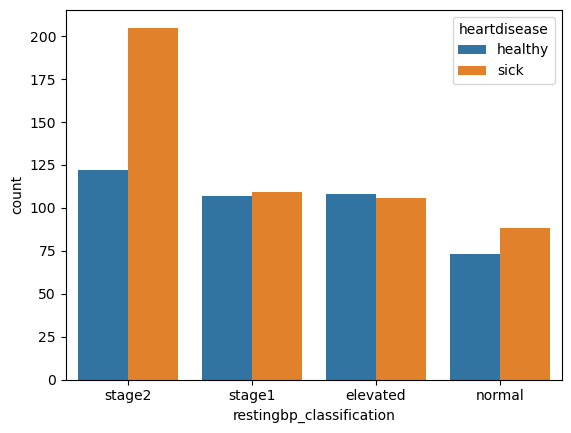

In [84]:
df['restingbp_classification'].value_counts()
x=df.groupby('restingbp_classification')['heartdisease'].value_counts()
sns.countplot(data=df,x='restingbp_classification',hue='heartdisease')
plt.show()


### Stage2 resting blood pressure is the most susceptible to heart disease 

### heart rate

In [85]:
def heart_rate_classification(x):
    if x<90:
        return 'bradycardia'
    elif x<110:
        return 'slight bradycardia'
    elif x<160:
        return 'normal'
    elif x<180:
        return 'slight tachycardia'
    elif x>180:
        return 'tachycardia'

In [86]:
df['heart_rate_classification']=df['maxhr'].apply(heart_rate_classification)

In [87]:
df['heart_rate_classification'].value_counts()

heart_rate_classification
normal                592
slight tachycardia    164
slight bradycardia     98
bradycardia            27
tachycardia            27
Name: count, dtype: int64

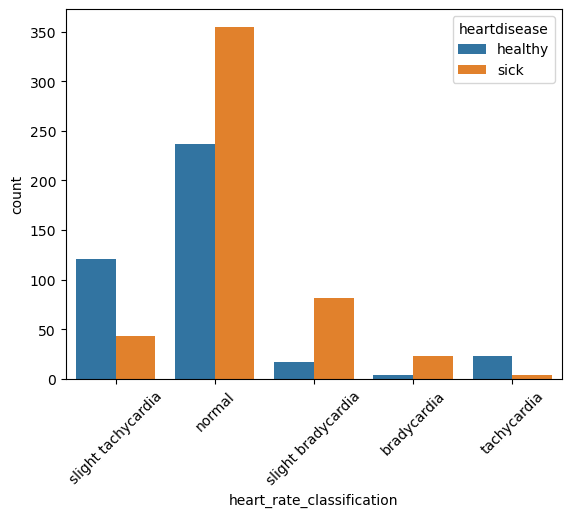

In [88]:
name=df.groupby('heart_rate_classification')['heartdisease'].value_counts()

sns.countplot(data=df, x='heart_rate_classification', hue="heartdisease")
plt.xticks(rotation=45)

plt.show()

### patients with any form of tachycardia seem to have lower chance of having heart disease 

### old peak

### ST slope

In [89]:
df['st_slope'].value_counts()

st_slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

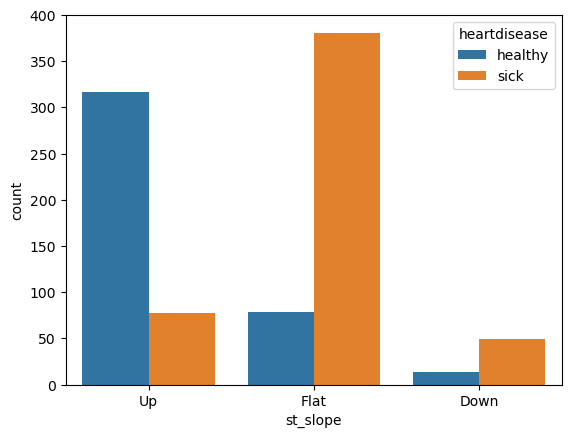

In [90]:
df.groupby('st_slope')['heartdisease'].value_counts()

sns.countplot(data=df,x='st_slope',hue='heartdisease')
plt.show()

### a flat st-slope which indicates that a patient suffers from lack of bloodflow to the heart muscle have a very high chance of having heart disease  
### a down st-slope which indicates that a patient blood has low oxygen has a high chance of having a heart disease as well

#### age and bp

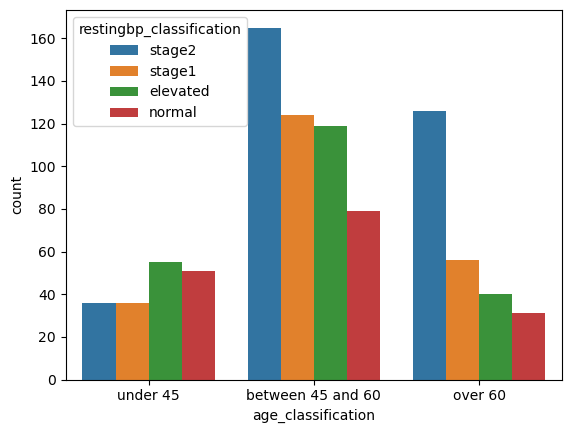

50


In [91]:
df.groupby('age_classification')['restingbp_classification'].value_counts()
sns.countplot(data=df, x="age_classification", hue="restingbp_classification")
plt.show()

x=df.groupby('age_classification')['restingbp_classification'].value_counts().reset_index()
stage2=x['count'][4]/(x['count'][4:8].sum())

print(f'{round(stage2*100)}')


### 50 % of pateints over 60 have stage 2 high blood pressure 

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        918 non-null    int64  
 1   sex                        918 non-null    object 
 2   chestpaintype              918 non-null    object 
 3   restingbp                  918 non-null    int64  
 4   cholesterol                918 non-null    int64  
 5   fastingbs                  918 non-null    int64  
 6   restingecg                 918 non-null    object 
 7   maxhr                      918 non-null    int64  
 8   exerciseangina             918 non-null    object 
 9   oldpeak                    918 non-null    float64
 10  st_slope                   918 non-null    object 
 11  heartdisease               918 non-null    object 
 12  age_classification         918 non-null    object 
 13  restingbp_classification   918 non-null    object 

In [93]:
df

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,age_classification,restingbp_classification,heart_rate_classification
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,healthy,under 45,stage2,slight tachycardia
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,sick,between 45 and 60,stage2,normal
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,healthy,under 45,stage1,slight bradycardia
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,sick,between 45 and 60,stage1,slight bradycardia
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,healthy,between 45 and 60,stage2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,sick,between 45 and 60,normal,normal
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,sick,over 60,stage2,normal
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,sick,between 45 and 60,stage1,normal
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,sick,between 45 and 60,stage1,slight tachycardia


In [94]:
df.drop(['age','restingbp','maxhr','cholesterol'],axis=1,inplace=True)
df

,sex,chestpaintype,fastingbs,restingecg,exerciseangina,oldpeak,st_slope,heartdisease,age_classification,restingbp_classification,heart_rate_classification
0,M,ATA,0,Normal,N,0.0,Up,healthy,under 45,stage2,slight tachycardia
1,F,NAP,0,Normal,N,1.0,Flat,sick,between 45 and 60,stage2,normal
2,M,ATA,0,ST,N,0.0,Up,healthy,under 45,stage1,slight bradycardia
3,F,ASY,0,Normal,Y,1.5,Flat,sick,between 45 and 60,stage1,slight bradycardia
4,M,NAP,0,Normal,N,0.0,Up,healthy,between 45 and 60,stage2,normal
...,...,...,...,...,...,...,...,...,...,...,...
913,M,TA,0,Normal,N,1.2,Flat,sick,between 45 and 60,normal,normal
914,M,ASY,1,Normal,N,3.4,Flat,sick,over 60,stage2,normal
915,M,ASY,0,Normal,Y,1.2,Flat,sick,between 45 and 60,stage1,normal
916,F,ATA,0,LVH,N,0.0,Flat,sick,between 45 and 60,stage1,slight tachycardia


<Axes: >

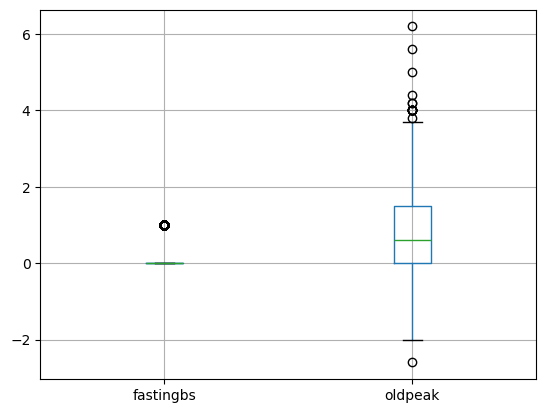

In [95]:
df.boxplot()

### Machine Learning Model 

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import OneHotEncoder # no order
from sklearn.preprocessing import LabelEncoder  # order

from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score
#from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [97]:
df.select_dtypes('O').columns

Index(['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope',
       'heartdisease', 'age_classification', 'restingbp_classification',
       'heart_rate_classification'],
      dtype='object')

In [98]:
hot=OneHotEncoder(sparse_output=False)
le=LabelEncoder()

In [99]:
'''hot_cols = ["chestpaintype", "restingecg"]

encoded = hot.fit_transform(df[hot_cols])

df_encoded = pd.DataFrame(
    encoded,
    columns=hot.get_feature_names_out(hot_cols),
    index=df.index 
)

df = df.drop(hot_cols, axis=1).join(df_encoded)

print(df.head())'''

'hot_cols = ["chestpaintype", "restingecg"]\n\nencoded = hot.fit_transform(df[hot_cols])\n\ndf_encoded = pd.DataFrame(\n    encoded,\n    columns=hot.get_feature_names_out(hot_cols),\n    index=df.index \n)\n\ndf = df.drop(hot_cols, axis=1).join(df_encoded)\n\nprint(df.head())'

In [100]:
#le_cols = ["sex", "exerciseangina", "age_classification",'st_slope','restingbp_classification','heart_rate_classification']

#for col in le_cols:
#    df[col] = le.fit_transform(df[col])


for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
print(df.head())

   sex  chestpaintype  fastingbs  restingecg  exerciseangina  oldpeak  \
0    1              1          0           1               0      0.0   
1    0              2          0           1               0      1.0   
2    1              1          0           2               0      0.0   
3    0              0          0           1               1      1.5   
4    1              2          0           1               0      0.0   

   st_slope  heartdisease  age_classification  restingbp_classification  \
0         2             0                   2                         3   
1         1             1                   0                         3   
2         2             0                   2                         2   
3         1             1                   0                         2   
4         2             0                   0                         3   

   heart_rate_classification  
0                          3  
1                          1  
2                

<Axes: >

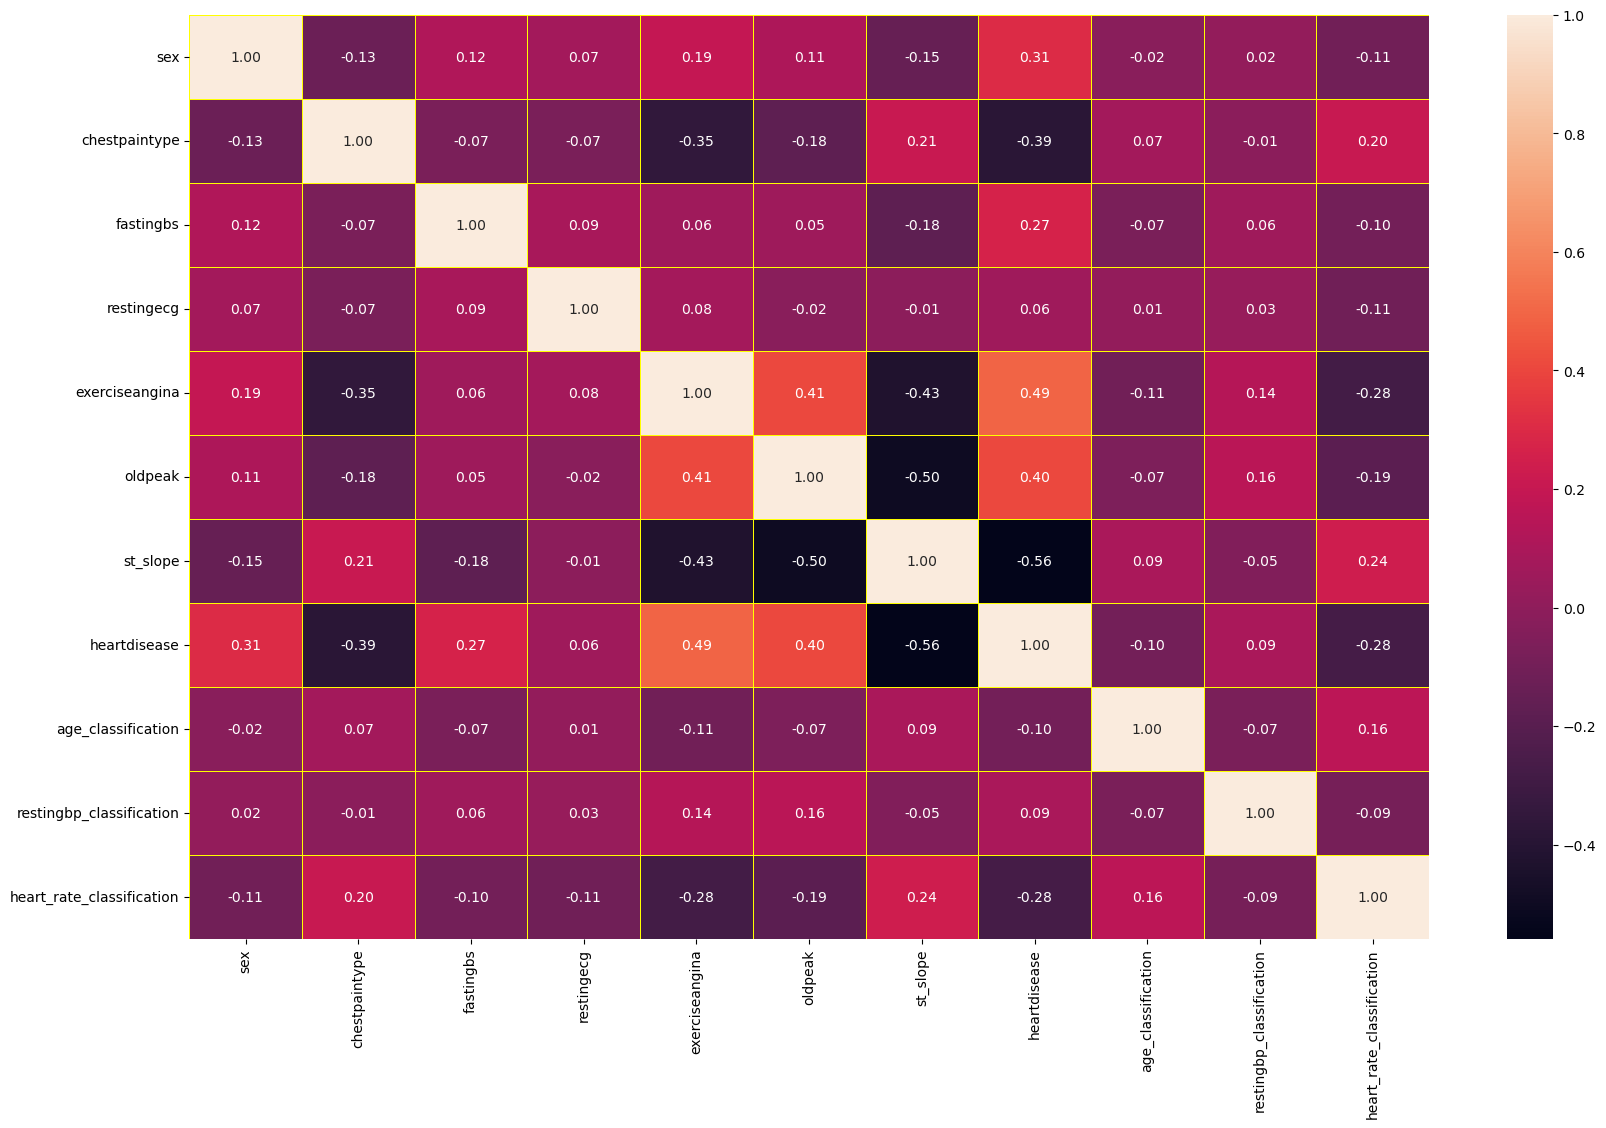

In [101]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=0.5,linecolor='yellow')

In [102]:
corr_matrix=df.corr()

target_corr=corr_matrix['heartdisease'].drop('heartdisease')

top_features=target_corr[target_corr.abs()>0.1].index.tolist()

top_features

['sex',
 'chestpaintype',
 'fastingbs',
 'exerciseangina',
 'oldpeak',
 'st_slope',
 'age_classification',
 'heart_rate_classification']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        918 non-null    int32  
 1   chestpaintype              918 non-null    int32  
 2   fastingbs                  918 non-null    int64  
 3   restingecg                 918 non-null    int32  
 4   exerciseangina             918 non-null    int32  
 5   oldpeak                    918 non-null    float64
 6   st_slope                   918 non-null    int32  
 7   heartdisease               918 non-null    int32  
 8   age_classification         918 non-null    int32  
 9   restingbp_classification   918 non-null    int32  
 10  heart_rate_classification  918 non-null    int32  
dtypes: float64(1), int32(9), int64(1)
memory usage: 46.7 KB


In [104]:
#x=df[['sex','fastingbs','exerciseangina','oldpeak','st_slope','age_classification','heart_rate_classification','chestpaintype_ASY','chestpaintype_ATA',
#'chestpaintype_NAP','restingecg_ST']]

x=df.drop('heartdisease',axis=1)
y=df['heartdisease']

print(x.shape)
print(y.shape)

(918, 10)
(918,)


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [106]:
x_train

,sex,chestpaintype,fastingbs,restingecg,exerciseangina,oldpeak,st_slope,age_classification,restingbp_classification,heart_rate_classification
795,1,2,1,1,0,0.8,0,2,0,4
25,1,2,0,1,0,0.0,2,2,2,3
84,1,0,1,1,1,1.0,1,0,3,1
10,0,2,0,1,0,0.0,2,2,2,1
344,1,0,1,1,0,0.0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,2,0,0.0,2,0,0,1
270,1,0,0,1,0,0.0,2,0,0,1
860,1,0,0,1,1,1.4,2,1,2,1
435,1,0,0,2,1,0.0,2,1,3,1


In [107]:
scaler=StandardScaler()

scaler.fit(x_train)

# Transform both training and test data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


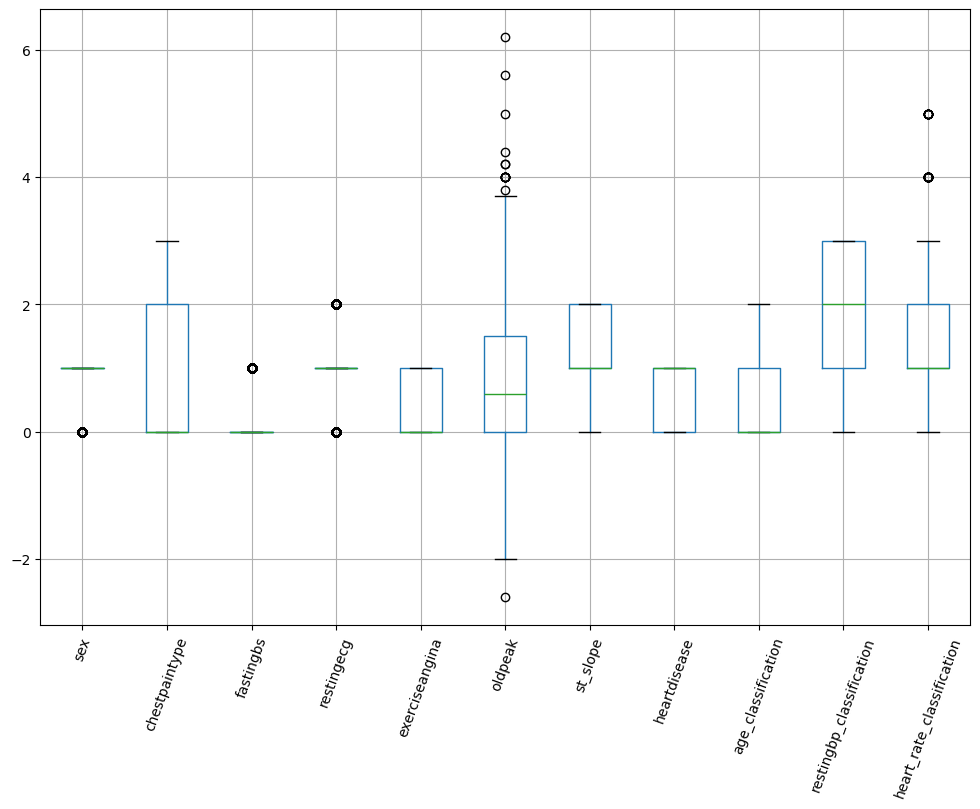

In [108]:
df.boxplot(figsize=(12,8))
plt.xticks(rotation=70)
plt.show()

In [109]:
x_test=pd.DataFrame(x_test)
x_train=pd.DataFrame(x_train)

In [110]:
model1=LogisticRegression()
model2=SVC()
model3=KNeighborsClassifier()
model4=DecisionTreeClassifier()
model5=GaussianNB()
model6=RandomForestClassifier()
model7=GradientBoostingClassifier()

models=[model1,model2,model3,model4,model5,model6,model7]

In [111]:
model8=LogisticRegression()
model9=SVC(kernel='linear', probability=True)
model10=KNeighborsClassifier(n_neighbors=5)
model11=DecisionTreeClassifier(max_depth=10)
model12=GaussianNB()
model13=RandomForestClassifier(n_estimators=700, random_state=41)
model14=GradientBoostingClassifier(n_estimators=600)

models_2=[model8,model9,model10,model11,model12,model13,model14]

### logistic regression 

In [112]:
param_grids = {
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"],
        "penalty": ["l2"]   
    },
    
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    },
    
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7, 9, 11, 15],
        "weights": ["uniform", "distance"],
        "p": [1, 2]   
    },
    
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    
    "GaussianNB": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    
    "RandomForestClassifier": {
        "n_estimators": [100, 300, 500],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_features": ["sqrt", "log2"]
    },
    
    "GradientBoostingClassifier": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "subsample": [0.8, 1.0]
    }
}


In [113]:
'''models = {
    "LogisticRegression": model1,
    "SVC": model2,
    "KNeighborsClassifier": model3,
    "DecisionTreeClassifier": model4,
    "GaussianNB": model5,
    "RandomForestClassifier": model6,
    "GradientBoostingClassifier": model7
}

best_models = {}

for name, model in models.items():
    print(f"Tuning {name} ...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring="accuracy",   # optimize for F1 (change if needed)
        cv=5,
        n_jobs=-1,
        verbose=2
    )
    grid.fit(x_train, y_train)
    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Best CV Score: {grid.best_score_}")
    best_models[name] = grid.best_estimator_
'''

'models = {\n    "LogisticRegression": model1,\n    "SVC": model2,\n    "KNeighborsClassifier": model3,\n    "DecisionTreeClassifier": model4,\n    "GaussianNB": model5,\n    "RandomForestClassifier": model6,\n    "GradientBoostingClassifier": model7\n}\n\nbest_models = {}\n\nfor name, model in models.items():\n    print(f"Tuning {name} ...")\n    grid = GridSearchCV(\n        estimator=model,\n        param_grid=param_grids[name],\n        scoring="accuracy",   # optimize for F1 (change if needed)\n        cv=5,\n        n_jobs=-1,\n        verbose=2\n    )\n    grid.fit(x_train, y_train)\n    print(f"Best Params for {name}: {grid.best_params_}")\n    print(f"Best CV Score: {grid.best_score_}")\n    best_models[name] = grid.best_estimator_\n'

In [114]:
#print(best_models)

In [115]:
model1=LogisticRegression(C=0.1, solver='liblinear')
model2=SVC(C=10,kernel='linear')
model3=KNeighborsClassifier(n_neighbors=11, p=1,weights='distance')
model4=DecisionTreeClassifier(criterion='entropy', max_depth=5)
model5=GaussianNB()
model6=RandomForestClassifier(max_depth=10,max_features='log2', min_samples_split=2,n_estimators=500)
model7=GradientBoostingClassifier(min_samples_leaf=2)

models=[model1,model2,model3,model4,model5,model6,model7]

In [116]:
col=['LogisticRegression','SVC','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]
result4=[]

col2=['LogisticRegression','SVC','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','GradientBoostingClassifier']
result5=[]
result6=[]
result7=[]
result8=[]

In [ ]:
def cal(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    recall=recall_score(pred,y_test)
    precision=precision_score(pred,y_test)
    f1=f1_score(pred,y_test)

    result1.append(accuracy)
    result2.append(recall)
    result3.append(precision)
    result4.append(f1)

    print(model)
    sns.heatmap(confusion_matrix(pred,y_test),fmt='.2f',annot=True)
    plt.show()
    
    print(f'''
              accuracy:  {accuracy} ,
              recall:    {recall} ,
              precision: {precision} ,
              f1:        {f1}

''')

def cal2(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    recall=recall_score(pred,y_test)
    precision=precision_score(pred,y_test)
    f1=f1_score(pred,y_test)

    result5.append(accuracy)
    result6.append(recall)
    result7.append(precision)
    result8.append(f1)

    print(model)
    sns.heatmap(confusion_matrix(pred,y_test),fmt='.2f',annot=True)
    plt.show()

    print(f'''
              accuracy:  {accuracy} ,
              recall:    {recall} ,
              precision: {precision} ,
              f1:        {f1}

''')





grid search models
LogisticRegression(C=0.1, solver='liblinear')


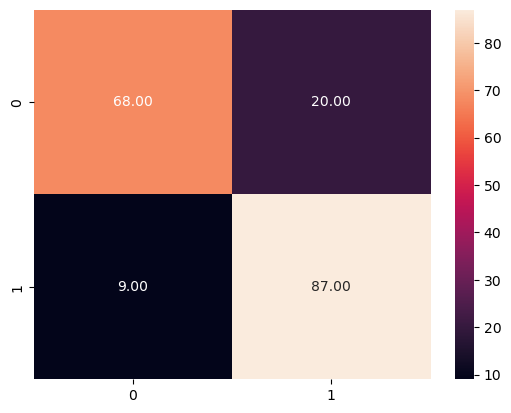

LogisticRegression(C=0.1, solver='liblinear')

              accuracy:  0.842391304347826 ,
              recall:    0.90625 ,
              precision: 0.8130841121495327 ,
              f1:        0.8571428571428571


None
SVC(C=10, kernel='linear')


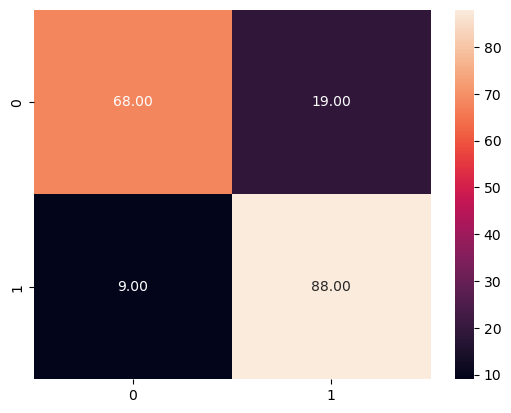

SVC(C=10, kernel='linear')

              accuracy:  0.8478260869565217 ,
              recall:    0.9072164948453608 ,
              precision: 0.822429906542056 ,
              f1:        0.8627450980392157


None
KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')


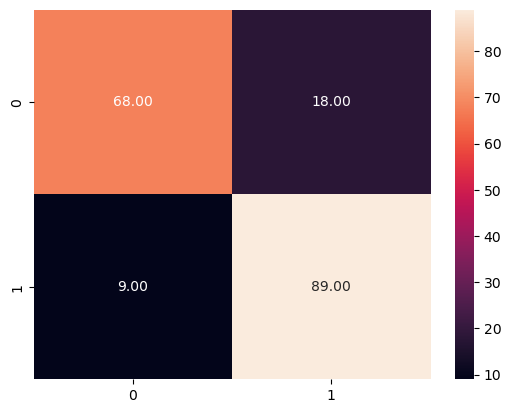

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

              accuracy:  0.8532608695652174 ,
              recall:    0.9081632653061225 ,
              precision: 0.8317757009345794 ,
              f1:        0.8682926829268293


None
DecisionTreeClassifier(criterion='entropy', max_depth=5)


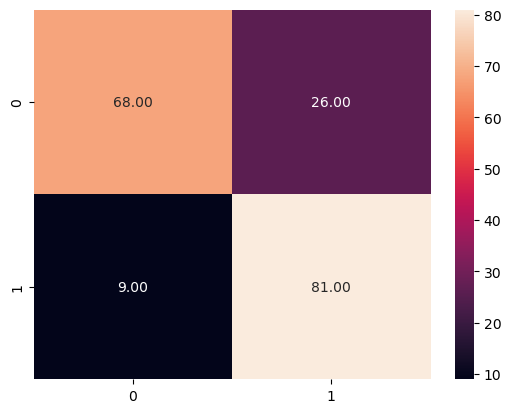

DecisionTreeClassifier(criterion='entropy', max_depth=5)

              accuracy:  0.8097826086956522 ,
              recall:    0.9 ,
              precision: 0.7570093457943925 ,
              f1:        0.8223350253807107


None
GaussianNB()


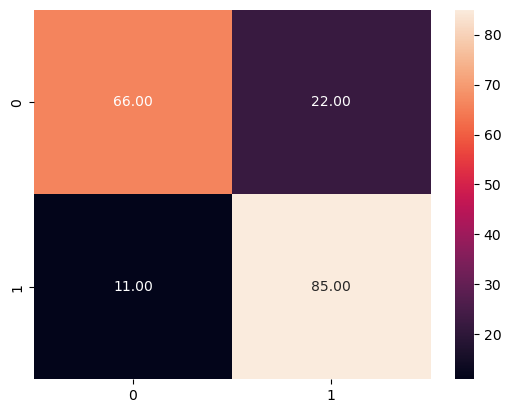

GaussianNB()

              accuracy:  0.8206521739130435 ,
              recall:    0.8854166666666666 ,
              precision: 0.794392523364486 ,
              f1:        0.8374384236453202


None
RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=500)


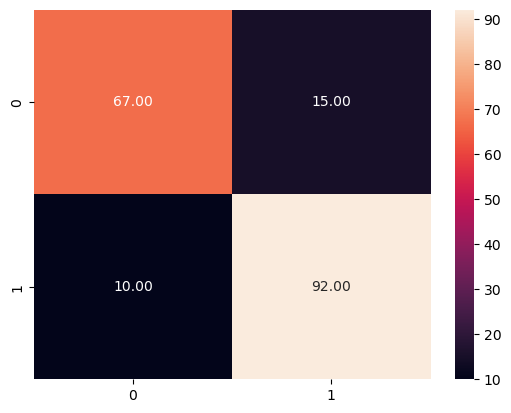

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=500)

              accuracy:  0.8641304347826086 ,
              recall:    0.9019607843137255 ,
              precision: 0.8598130841121495 ,
              f1:        0.8803827751196173


None
GradientBoostingClassifier(min_samples_leaf=2)


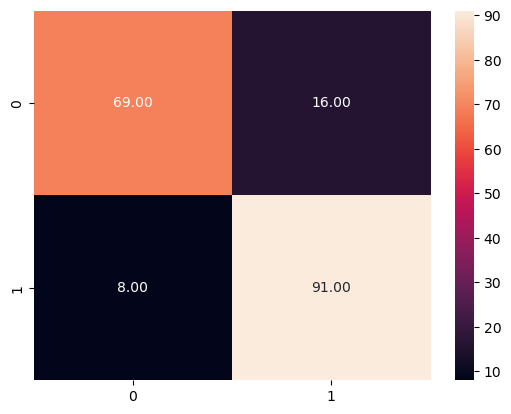

GradientBoostingClassifier(min_samples_leaf=2)

              accuracy:  0.8695652173913043 ,
              recall:    0.9191919191919192 ,
              precision: 0.8504672897196262 ,
              f1:        0.883495145631068


None
**************************************************
random models
LogisticRegression()


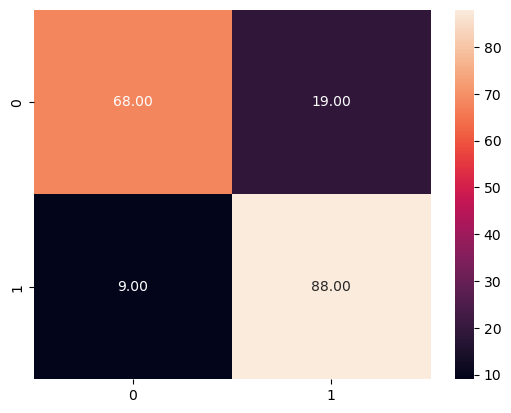


              accuracy:  0.8478260869565217 ,
              recall:    0.9072164948453608 ,
              precision: 0.822429906542056 ,
              f1:        0.8627450980392157


None
SVC(kernel='linear', probability=True)


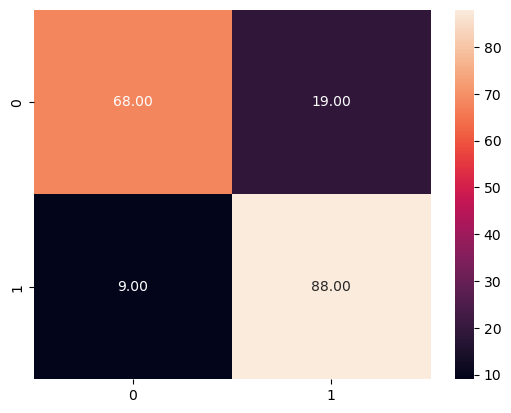


              accuracy:  0.8478260869565217 ,
              recall:    0.9072164948453608 ,
              precision: 0.822429906542056 ,
              f1:        0.8627450980392157


None
KNeighborsClassifier()


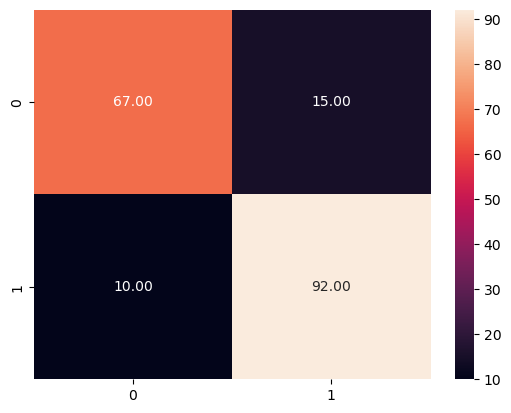


              accuracy:  0.8641304347826086 ,
              recall:    0.9019607843137255 ,
              precision: 0.8598130841121495 ,
              f1:        0.8803827751196173


None
DecisionTreeClassifier(max_depth=10)


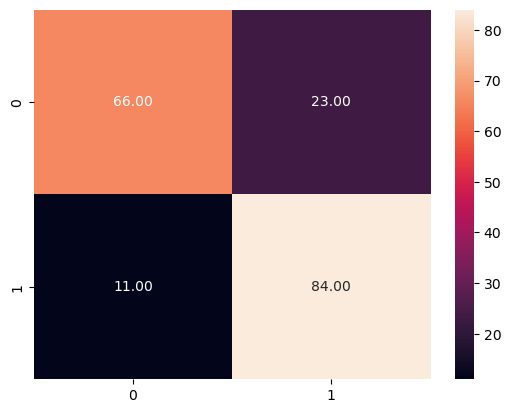


              accuracy:  0.8152173913043478 ,
              recall:    0.8842105263157894 ,
              precision: 0.7850467289719626 ,
              f1:        0.8316831683168316


None
GaussianNB()


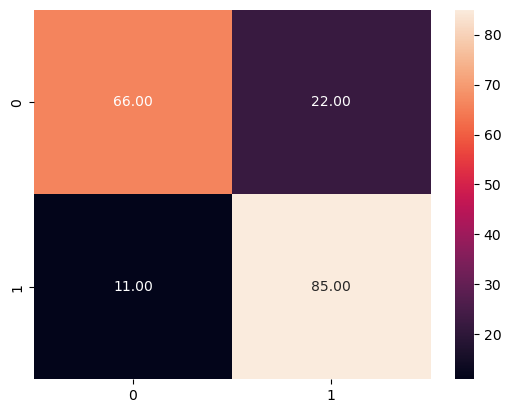


              accuracy:  0.8206521739130435 ,
              recall:    0.8854166666666666 ,
              precision: 0.794392523364486 ,
              f1:        0.8374384236453202


None
RandomForestClassifier(n_estimators=700, random_state=41)


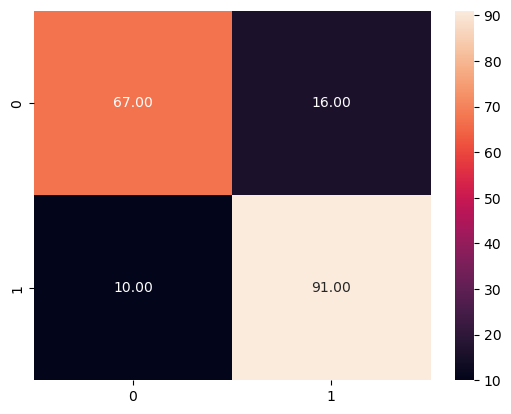


              accuracy:  0.8586956521739131 ,
              recall:    0.900990099009901 ,
              precision: 0.8504672897196262 ,
              f1:        0.875


None
GradientBoostingClassifier(n_estimators=600)


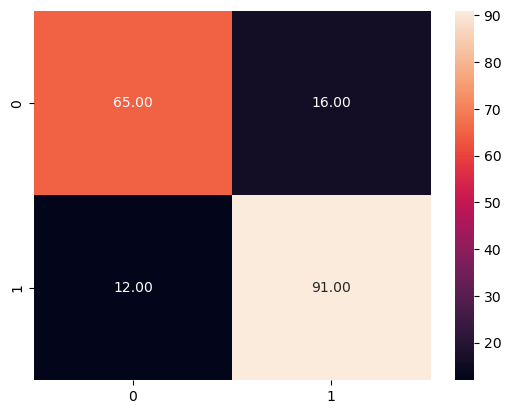


              accuracy:  0.8478260869565217 ,
              recall:    0.883495145631068 ,
              precision: 0.8504672897196262 ,
              f1:        0.8666666666666667


None


In [118]:
print('grid search models')

for i in models:
    print(cal(i))
print('*'*50)
print('random models')
for i in models_2:
    print(cal2(i))

In [119]:
final_result=pd.DataFrame({'algorithms':col,'accuracies':result1,'recall':result2,'presicion':result3,'f1':result4 })

final_result2=pd.DataFrame({'algorithms':col2,'accuracies':result5,'recall':result6,'presicion':result7,'f1':result8 })

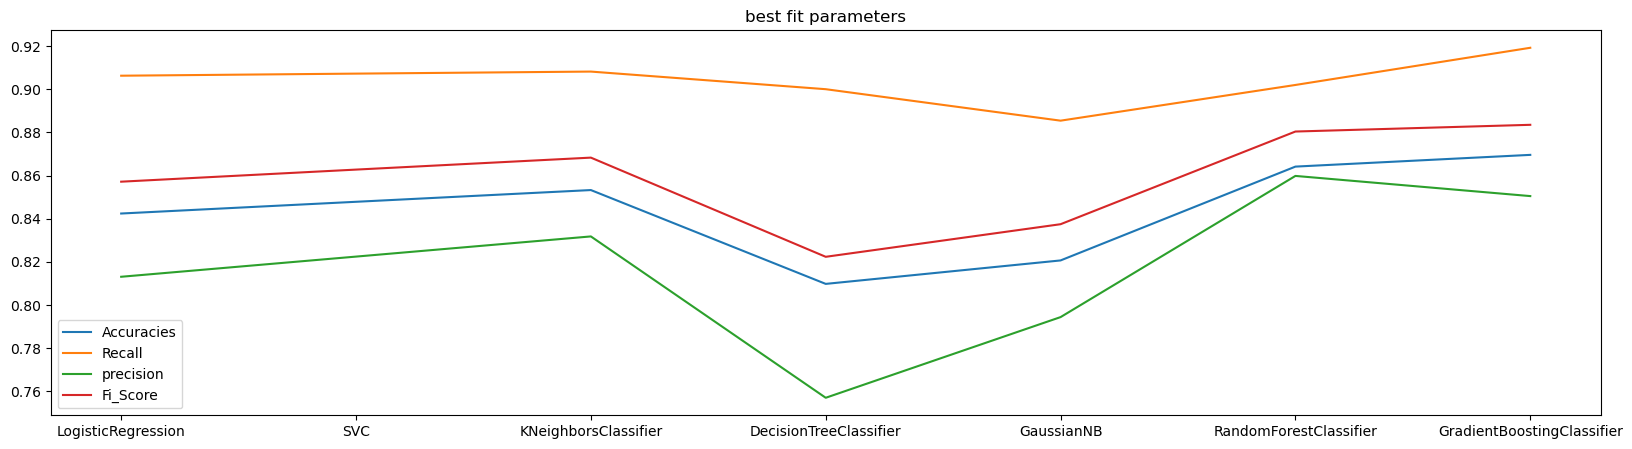

In [120]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.algorithms,result1, label='Accuracies')
plt.plot(final_result.algorithms,result2 , label='Recall')
plt.plot(final_result.algorithms,result3 , label='precision')
plt.plot(final_result.algorithms,result4 , label='Fi_Score')
plt.title('best fit parameters')
plt.legend()
plt.show()

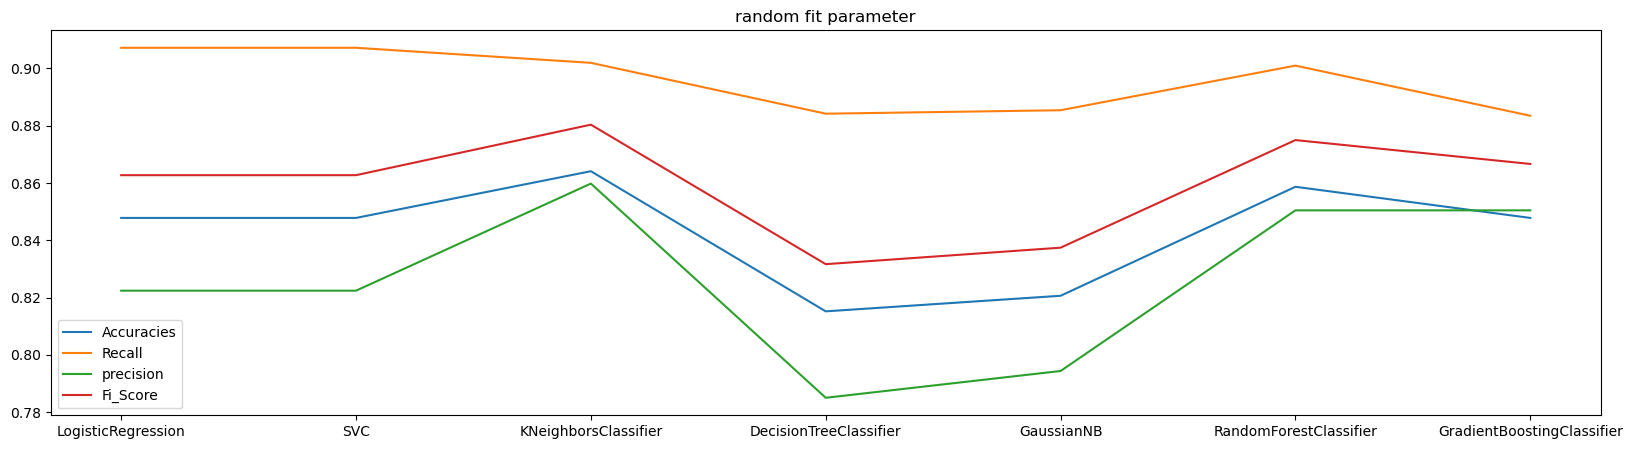

In [121]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result2.algorithms,result5, label='Accuracies')
plt.plot(final_result2.algorithms,result6 , label='Recall')
plt.plot(final_result2.algorithms,result7 , label='precision')
plt.plot(final_result2.algorithms,result8 , label='Fi_Score')
plt.legend()
plt.title('random fit parameter')
plt.show()